In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bond_pmts = pd.read_pickle("../../data/mbs_data_pickled/bond_pmts.pkl")

In [3]:
bond_pmts = bond_pmts.reset_index()
bond_pmts['CLASS INDICATOR'] = bond_pmts['Class']
bond_pmts.set_index('Date',inplace=True)
bond_pmts.set_index('Class',append=True,inplace=True)
bond_pmts = bond_pmts[['CLASS INDICATOR','CUSIP','Original Face Value','Beginning Certificate Balance','Principal Payment', \
                      'Principal Adjustment or Loss', 'Ending Certificate Balance', 'Interest Payment', \
                       'Pass-Through Rate']]
groupI = bond_pmts.xs(slice('I-A-1','I-M-9'),level=1)
groupI = groupI[groupI['CLASS INDICATOR']!='I-CE']
groupII = bond_pmts.xs(slice('II-1A-1','II-M-9'),level=1)
groupII = groupII[groupII['CLASS INDICATOR']!='II-CE']
senior_junior = pd.concat([groupI,groupII])
senior_junior.rename(columns={'CLASS INDICATOR':'Class'},inplace=True)
senior_junior.set_index('Class',append=True,inplace=True)

In [4]:
senior_junior['Monthly Net Cash In-Out'] = senior_junior['Principal Payment'] - senior_junior['Principal Adjustment or Loss'] \
    + senior_junior['Interest Payment']
nonzero = senior_junior[senior_junior['Beginning Certificate Balance']!=0]
nonzero['Monthly All-In Return'] = nonzero['Monthly Net Cash In-Out']  / nonzero['Beginning Certificate Balance']
nonzero['Annualized All-In Return'] = nonzero['Monthly All-In Return'] * 12
zeroes = senior_junior[senior_junior['Beginning Certificate Balance']==0]
zeroes['Monthly All-In Return'] = 0
zeroes['Annualized All-In Return'] = 0
senior_junior = pd.concat([nonzero,zeroes])

<ipython-input-4-2b0d7c704308>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonzero['Monthly All-In Return'] = nonzero['Monthly Net Cash In-Out']  / nonzero['Beginning Certificate Balance']
<ipython-input-4-2b0d7c704308>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonzero['Annualized All-In Return'] = nonzero['Monthly All-In Return'] * 12
<ipython-input-4-2b0d7c704308>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [5]:
senior_junior

CUSIP Original Face Value  \
Date       Class                                   
2007-01-25 I-A-1   07389RAA4         147515000.0   
           I-A-2   07389RAB2          67747000.0   
           I-A-3   07389RAC0          11213000.0   
           I-M-1   07389RAD8          17235000.0   
           I-M-2   07389RAE6          19813000.0   
...                      ...                 ...   
2020-03-25 II-M-5  07389RAX4          14940000.0   
           II-M-6  07389RAY2          12865000.0   
           II-M-7  07389RAZ9          12450000.0   
           II-M-8  07389RBA3           7055000.0   
           II-M-9  07389RBB1          11205000.0   

                  Beginning Certificate Balance Principal Payment  \
Date       Class                                                    
2007-01-25 I-A-1                    147515000.0        2576941.66   
           I-A-2                     67747000.0               0.0   
           I-A-3                     11213000.0               0.0   
           I-M-1                     17235000.0               0.0   
           I-M-2                     19813000.0               0.0   
...                                         ...               ...   
2020-03-25 II-M-5                           0.0               0.0   
           II-M-6                           0.0               0.0   
           II-M-7                           0.0               0.0   
           II-M-8                           0.0               0.0   
           II-M-9                           0.0               0.0   

                  Principal Adjustment or Loss Ending Certificate Balance  \
Date       Class                                                            
2007-01-25 I-A-1                           0.0               144938058.34   
           I-A-2                           0.0                 67747000.0   
           I-A-3                           0.0                 11213000.0   
           I-M-1                           0.0                 17235000.0   
           I-M-2                           0.0                 19813000.0   
...                                        ...                        ...   
2020-03-25 II-M-5                          0.0                        0.0   
           II-M-6                          0.0                        0.0   
           II-M-7                          0.0                        0.0   
           II-M-8                          0.0                        0.0   
           II-M-9                          0.0                        0.0   

                  Interest Payment Pass-Through Rate Monthly Net Cash In-Out  \
Date       Class                                                               
2007-01-25 I-A-1         604073.92            0.0546              3181015.58   
           I-A-2         281996.89            0.0555               281996.89   
           I-A-3           47010.5            0.0559                 47010.5   
           I-M-1          73550.36            0.0569                73550.36   
           I-M-2          84700.58             0.057                84700.58   
...                            ...               ...                     ...   
2020-03-25 II-M-5              0.0          0.020368                     0.0   
           II-M-6              0.0          0.021067                     0.0   
           II-M-7              0.0          0.025267                     0.0   
           II-M-8              0.0          0.032268                     0.0   
           II-M-9              0.0          0.038767                     0.0   

                  Monthly All-In Return Annualized All-In Return  
Date       Class                                                  
2007-01-25 I-A-1               0.021564                 0.258768  
           I-A-2               0.004163                  0.04995  
           I-A-3               0.004192                  0.05031  
           I-M-1               0.004267                  0.05121  
   

In [6]:
# Import credit ratings data and add it to the month-by-month dataframe
credit_ratings = pd.read_pickle("../../data/mbs_data_pickled/credit_ratings.pkl")
credit_ratings.drop(labels=['I-CE','I-P','II-CE','II-P'],level=1,inplace=True)
credit_ratings.drop(columns=['CUSIP'],inplace=True)
returns_with_ratings = pd.concat([credit_ratings,senior_junior],axis=1)

# Add columns with numerical versions of Moody's ratings, with a higher number being better (Aaa = 21, C = 1)
returns_with_ratings['Moody\'s Numerical'] = returns_with_ratings['Moody\'s']
moodys_to_numbers = {'Aaa':21,'Aa1':20,'Aa2':19,'Aa3':18,'A1':17,'A2':16,'A3':15,'Baa1':14,'Baa2':13,'Baa3':12,'Ba1':11,'Ba2':10,'Ba3':9,'B1':8,'B2':7,'B3':6,'Caa1':5,'Caa2':4,'Caa3':3,'Ca':2,'C':1}
returns_with_ratings['Moody\'s Numerical'].replace(moodys_to_numbers,inplace=True)

cols = returns_with_ratings.columns.tolist()
cols.append("Moody\'s")
cols.append("S&P")
cols = cols[2:]
cols
returns_with_ratings = returns_with_ratings[cols]

<ipython-input-7-6e14654ec262>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


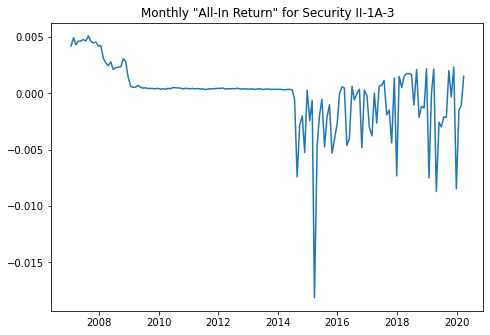

In [7]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(returns_with_ratings.xs('II-1A-3',level=1)['Monthly All-In Return'])
axes.set_title('Monthly "All-In Return" for Security II-1A-3')
fig.show()

In [8]:
returns_to_save_new = returns_with_ratings[['Monthly Net Cash In-Out','Monthly All-In Return','Annualized All-In Return']]
returns_to_save_new.rename(columns={'Monthly Net Cash In-Out':'Monthly Cash Minus Writedowns'},inplace=True)

/opt/anaconda3/envs/mbs_postmortem_20231105/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
returns_to_save_new.to_pickle('../../data/mbs_data_pickled/security_returns.pkl')

CURRENT PROGRESS (4/16/2020): senior_junior has the monthly and annualized 'All-In Return' figures

Problem: The annualized all-in return figures are meaningless if big writedowns are happening, so maybe I should only present the month-by-month returns

# Don't touch this! (old code)

In [10]:
# Fixes an issue where some credit ratings were being extracted with extra spaces after the letter rating
fix_this = pd.read_pickle("../../data/mbs_data_pickled/credit_ratings.pkl")
for x in fix_this.index:
    # Fix Moody's
    split_val = fix_this.xs(x[0],level=0)['Moody\'s'].loc[x[1]].split()
    fix_this.xs(x[0],level=0)['Moody\'s'].loc[x[1]] = split_val[0]
    # Fix S&P if a rating exists
    if type(fix_this.xs(x[0],level=0)['S&P'].loc[x[1]]) == str:
        split_val2 = fix_this.xs(x[0],level=0)['S&P'].loc[x[1]].split()
        fix_this.xs(x[0],level=0)['S&P'].loc[x[1]] = split_val2[0]
fix_this.to_pickle('../../data/mbs_data_pickled/credit_ratings.pkl')

/opt/anaconda3/envs/mbs_postmortem_20231105/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
